In [0]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [3]:
#Running or Importing .py Files with Google Colab
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
df = pd.read_csv('/content/drive/My Drive/app/winemag-data-130k-v2.csv', index_col=0)

In [5]:
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [49]:
# Groupby by country
country = df.groupby("country")

# Summary statistic of all countries
country.describe().head(3)

points                             ...  price                    
            count       mean       std   min  ...    25%   50%    75%    max
country                                       ...                           
Argentina  3800.0  86.710263  3.179627  80.0  ...  12.00  17.0  25.00  230.0
Armenia       2.0  87.500000  0.707107  87.0  ...  14.25  14.5  14.75   15.0
Australia  2329.0  88.580507  2.989900  80.0  ...  15.00  21.0  38.00  850.0

[3 rows x 16 columns]

In [59]:
ausWines = df[(df.country == 'Australia')]
ausWines.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
77,Australia,This medium-bodied Chardonnay features aromas ...,Made With Organic Grapes,86,18.0,South Australia,South Australia,NaN,Joe Czerwinski,@JoeCz,Yalumba 2016 Made With Organic Grapes Chardonn...,Chardonnay,Yalumba
83,Australia,"Pale copper in hue, this wine exudes passion f...",Jester Sangiovese,86,20.0,South Australia,McLaren Vale,NaN,Joe Czerwinski,@JoeCz,Mitolo 2016 Jester Sangiovese Rosé (McLaren Vale),Rosé,Mitolo
123,Australia,The blend is roughly two-thirds Shiraz and one...,Parson's Flat,92,40.0,South Australia,Padthaway,NaN,Joe Czerwinski,@JoeCz,Henry's Drive Vignerons 2006 Parson's Flat Shi...,Shiraz-Cabernet Sauvignon,Henry's Drive Vignerons
191,Australia,"From the little-known region of Padthaway, thi...",The Trial of John Montford,87,30.0,South Australia,Padthaway,NaN,Joe Czerwinski,@JoeCz,Henry's Drive Vignerons 2006 The Trial of John...,Cabernet Sauvignon,Henry's Drive Vignerons
232,Australia,Lifted cedar and pine notes interspersed with ...,Red Belly Black,85,12.0,South Australia,South Australia,NaN,NaN,NaN,Angove's 2006 Red Belly Black Shiraz (South Au...,Shiraz,Angove's


In [55]:
country.mean().sort_values(by="points",ascending=False).head(10)


,points,price
country,,
England,91.581081,51.681159
India,90.222222,13.333333
Austria,90.101345,30.762772
Germany,89.851732,42.257547
Canada,89.369650,35.712598
Hungary,89.191781,40.648276
China,89.000000,18.000000
France,88.845109,41.139120
Luxembourg,88.666667,23.333333


In [62]:
ausWines[['points']].quantile([0.25, 0.5, 0.75, 1])



,points
0.25,87.0
0.50,89.0
0.75,91.0
1.00,100.0


In [56]:
df[df["country"]=="Australia"].description

77        This medium-bodied Chardonnay features aromas ...
83        Pale copper in hue, this wine exudes passion f...
123       The blend is roughly two-thirds Shiraz and one...
191       From the little-known region of Padthaway, thi...
232       Lifted cedar and pine notes interspersed with ...
238       The sort of wine one imagines early Australian...
246       Juicy and well balanced, this is an admirable ...
293       This wine displays ample concentration in its ...
345       This wine contains some material over 100 year...
346       This deep brown wine smells like a damp, mossy...
348       Deep mahogany. Dried fig and black tea on the ...
349       RunRig is always complex, and the 2012 doesn't...
356       Dusty, firm, powerful: just a few apt descript...
360       Bacon and tapenade elements merge easily on th...
365       The Taylor family selected Clare Valley for it...
628       This plush, full-bodied wine is already delici...
633       This full-bodied wine is rich 

In [6]:
pip install wordcloud

In [0]:
?WordCloud

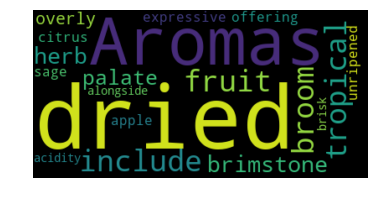

In [7]:
# Start with one review:
text = df.description[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

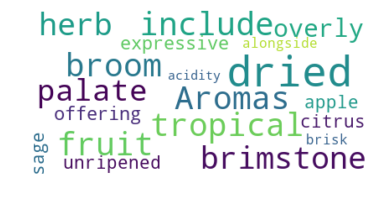

In [8]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [0]:
text = " ".join(review for review in df.description)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 31661073 words in the combination of all review.


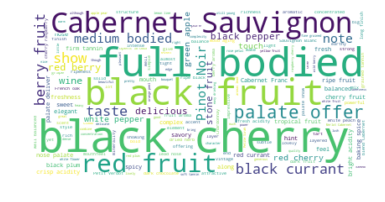

In [0]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["drink", "now", "wine", "flavor", "flavors"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

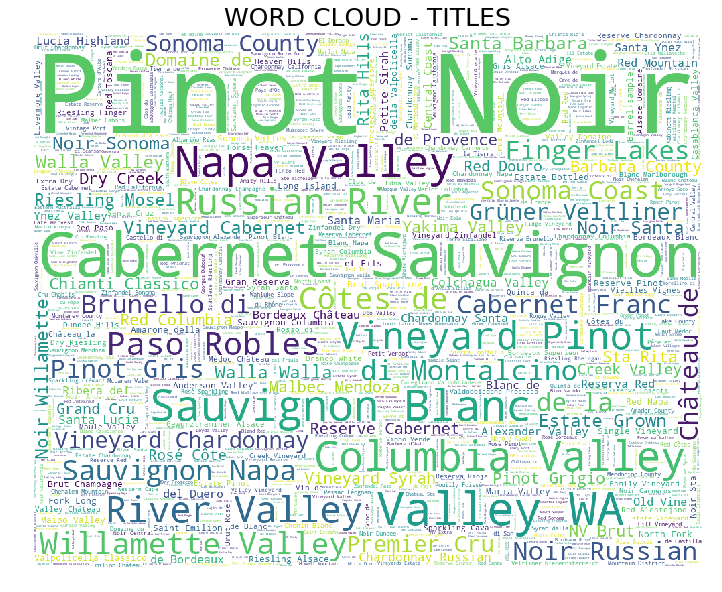

In [10]:
stopwords = set(STOPWORDS)

newStopWords = ['']

stopwords.update(newStopWords)

wordcloud = WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words=1500,
    max_font_size=200, 
    width=1000, height=800,
    random_state=42,
).generate(" ".join(df['title'].astype(str)))

print(wordcloud)
fig = plt.figure(figsize = (12,14))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - TITLES",fontsize=25)
plt.axis('off')
plt.show()

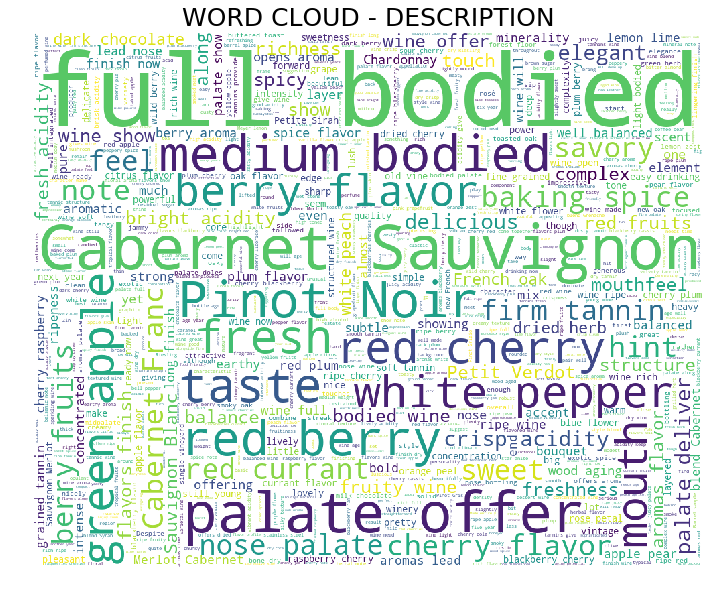

In [12]:
stopwords = set(STOPWORDS)

newStopWords = ['fruit', "Drink", "black"]

stopwords.update(newStopWords)

wordcloud = WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words=1500,
    max_font_size=200, 
    width=1000, height=800,
    random_state=42,
).generate(" ".join(df['description'].astype(str)))

print(wordcloud)
fig = plt.figure(figsize = (12,14))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - DESCRIPTION",fontsize=25)
plt.axis('off')
plt.show()

(-0.5, 399.5, 199.5, -0.5)

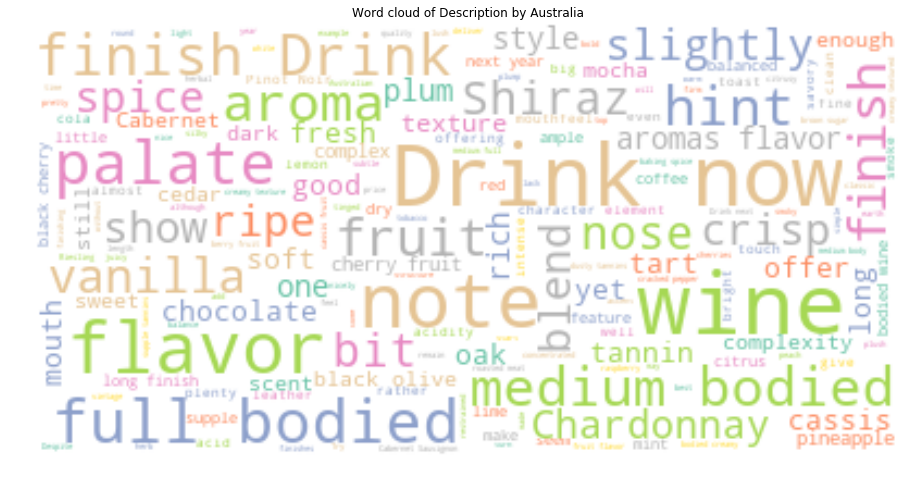

In [39]:
plt.figure(figsize= (16,8))
plt.title('Word cloud of Description by Australia')
wc = WordCloud(max_words=1000,max_font_size=40,background_color='white', stopwords = STOPWORDS)
wc.generate(' '.join(df[df['country'] =='Australia']['description']))
plt.imshow(wc.recolor(colormap='Set2'),interpolation="bilinear")
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

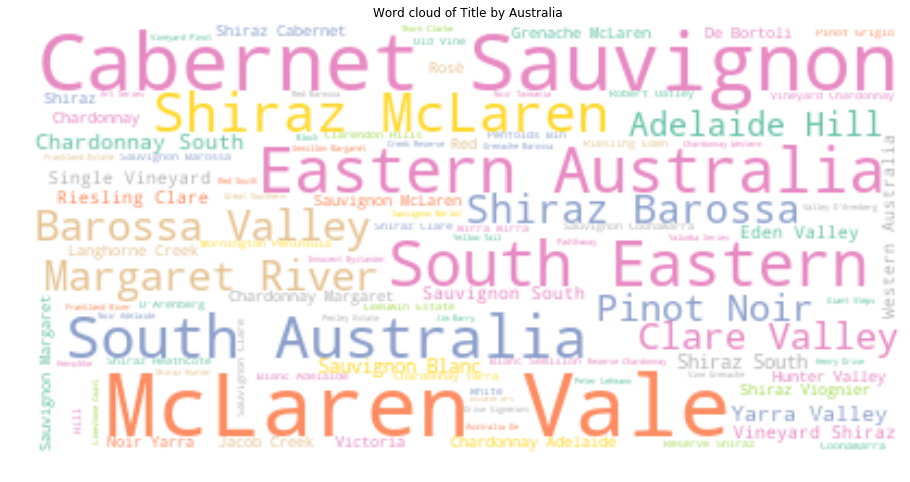

In [41]:
plt.figure(figsize= (16,8))
plt.title('Word cloud of Title by Australia')
wc = WordCloud(max_words=1000,max_font_size=40,background_color='white', stopwords = STOPWORDS)
wc.generate(' '.join(df[df['country'] =='Australia']['title']))
plt.imshow(wc.recolor(colormap='Set2'),interpolation="bilinear")
plt.axis('off')

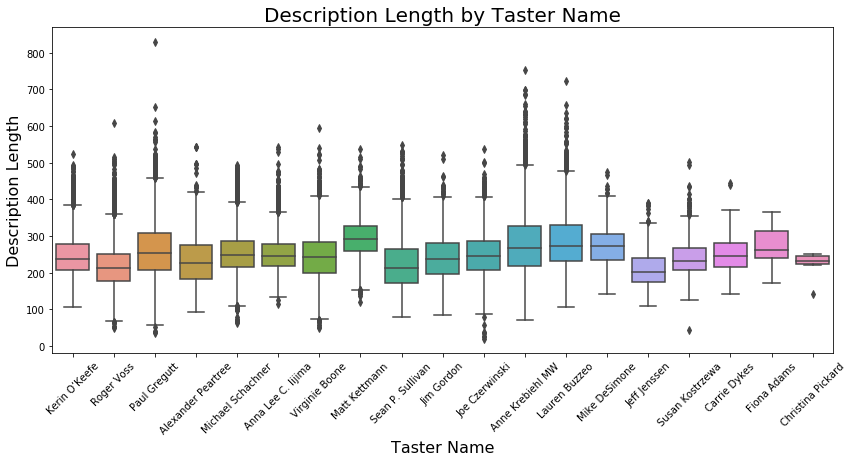

In [17]:
plt.figure(figsize=(14,6))
df_wine1 = df.assign(desc_length = df['description'].apply(len))
g = sns.boxplot(x='taster_name', y='desc_length', data=df_wine1)
g.set_title('Description Length by Taster Name', fontsize=20)
g.set_ylabel('Description Length', fontsize = 16) # Y label
g.set_xlabel('Taster Name', fontsize = 16) # X label
g.set_xticklabels(g.get_xticklabels(),rotation=45)
plt.show()

**Very cool! We can see that the wine's with highest points also have the biggest descriptions length. It's very interesting to understand.**

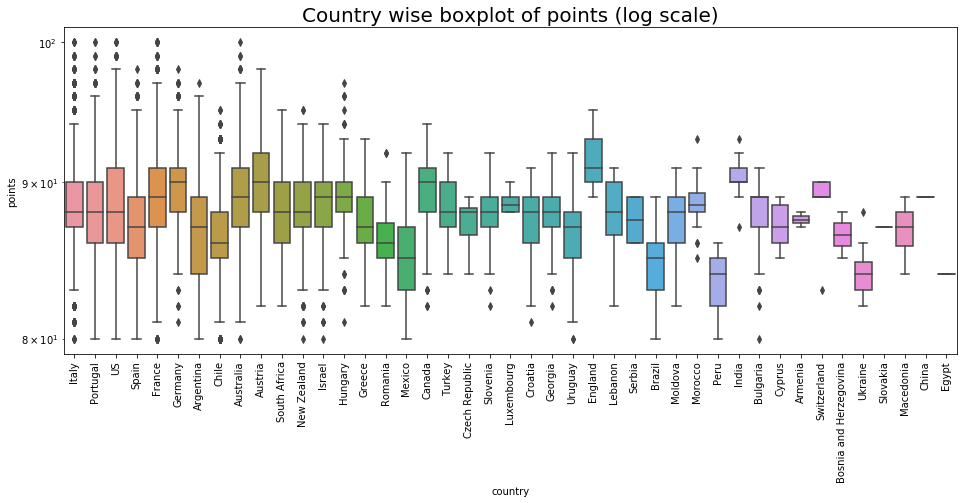

In [65]:
plt.figure(figsize=(16,6))
sns.boxplot(x = df['country'], y = df['points'])
plt.yscale("log")
plt.title('Country wise boxplot of points (log scale)', fontsize=20)
plt.xticks(rotation=90);

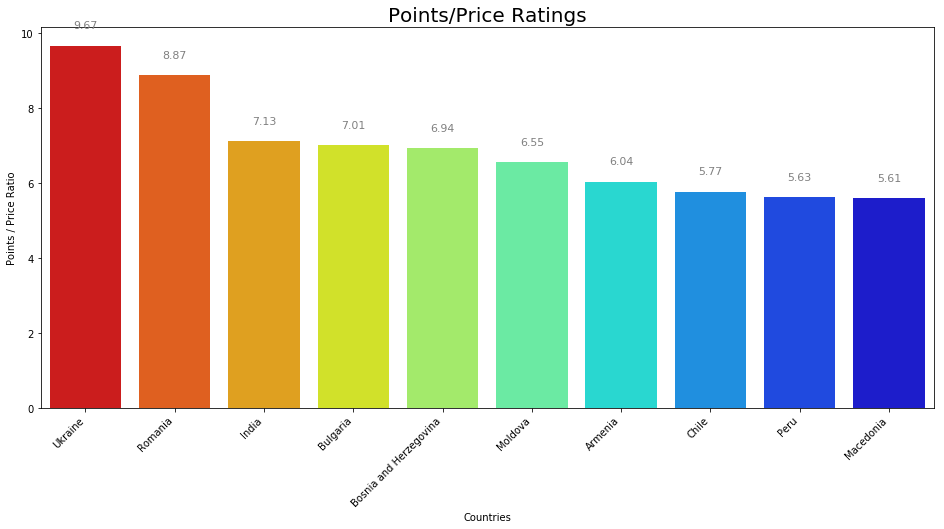

In [66]:
df2 = df[np.isfinite(df["price"])]
df2["points/price"] = df2.points / df2.price
df2.groupby("country").mean().sort_values(by="points/price", ascending=False)
plt.figure(figsize=(16,7))
g = sns.barplot(x=df2.groupby("country").mean().sort_values(by="points/price", ascending=False)["points/price"].index[:10], y=df2.groupby("country").mean().sort_values(by="points/price", ascending=False)["points/price"].values[:10], palette="jet_r")
plt.xlabel("Countries")
plt.xticks(rotation= 45, ha="right")
plt.ylabel("Points / Price Ratio")
plt.title('Points/Price Ratings', fontsize=20)
ax=g
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),
                 textcoords='offset points')
plt.show()

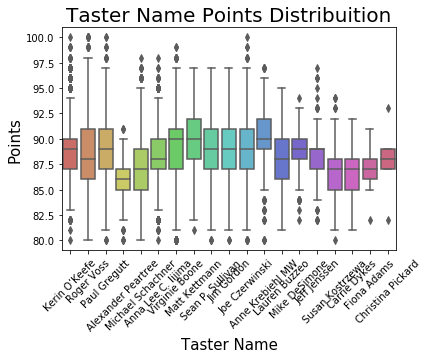

In [38]:
g2 = sns.boxplot(y='points', x='taster_name',
                  data=df_wine1, palette='hls')
g2.set_title("Taster Name Points Distribuition", fontsize=20)
g2.set_xlabel("Taster Name", fontsize=15)
g2.set_ylabel("Points", fontsize=15)
g2.set_xticklabels(g2.get_xticklabels(),rotation=45)

plt.subplots_adjust(hspace = 0.6,top = 0.9)

plt.show()


In [24]:
pip install squarify

Number of province: 425


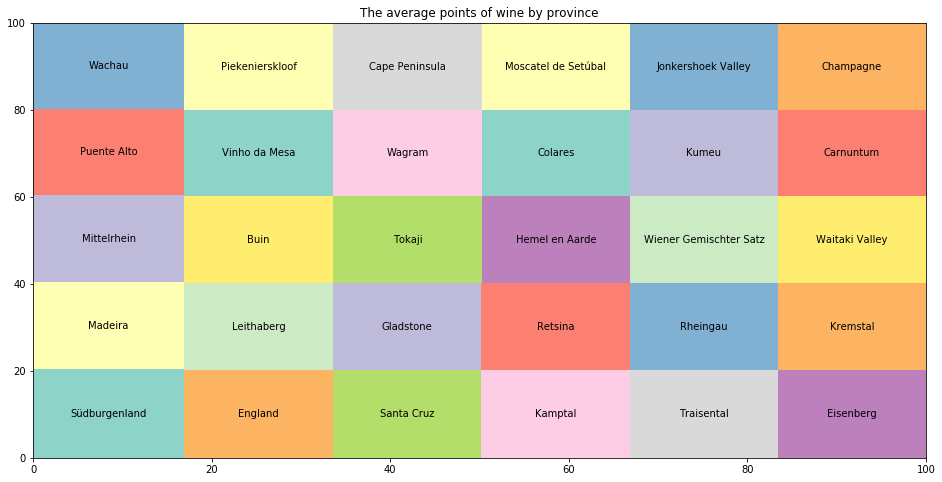

In [64]:
import squarify
print('Number of province:',df['province'].nunique())
cnt = df.groupby(['province'])['points'].mean().sort_values(ascending=False).to_frame()[:30]
plt.figure(figsize=(16,8))
squarify.plot(cnt['points'].fillna(0.001),label=cnt.index,color= sns.color_palette('Set3'))
plt.title('The average points of wine by province');